In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data=pd.read_csv(r"C:\Users\DHANVIN RANJITH\Downloads\heart.csv")

In [17]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [18]:
data.target.unique()

array([1, 0], dtype=int64)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


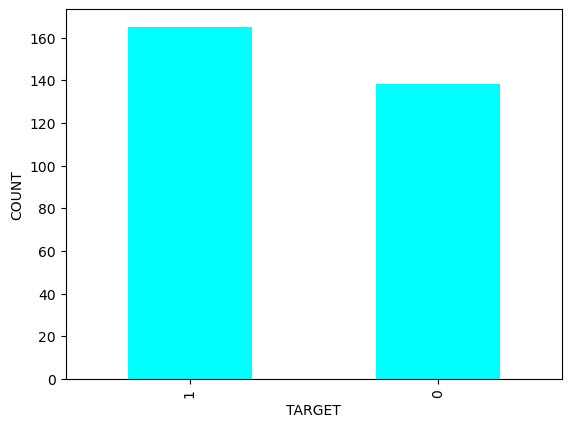

In [22]:
data.target.value_counts().plot(kind='bar',color='cyan')
plt.xlabel('TARGET')
plt.ylabel('COUNT')
plt.show()

In [23]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


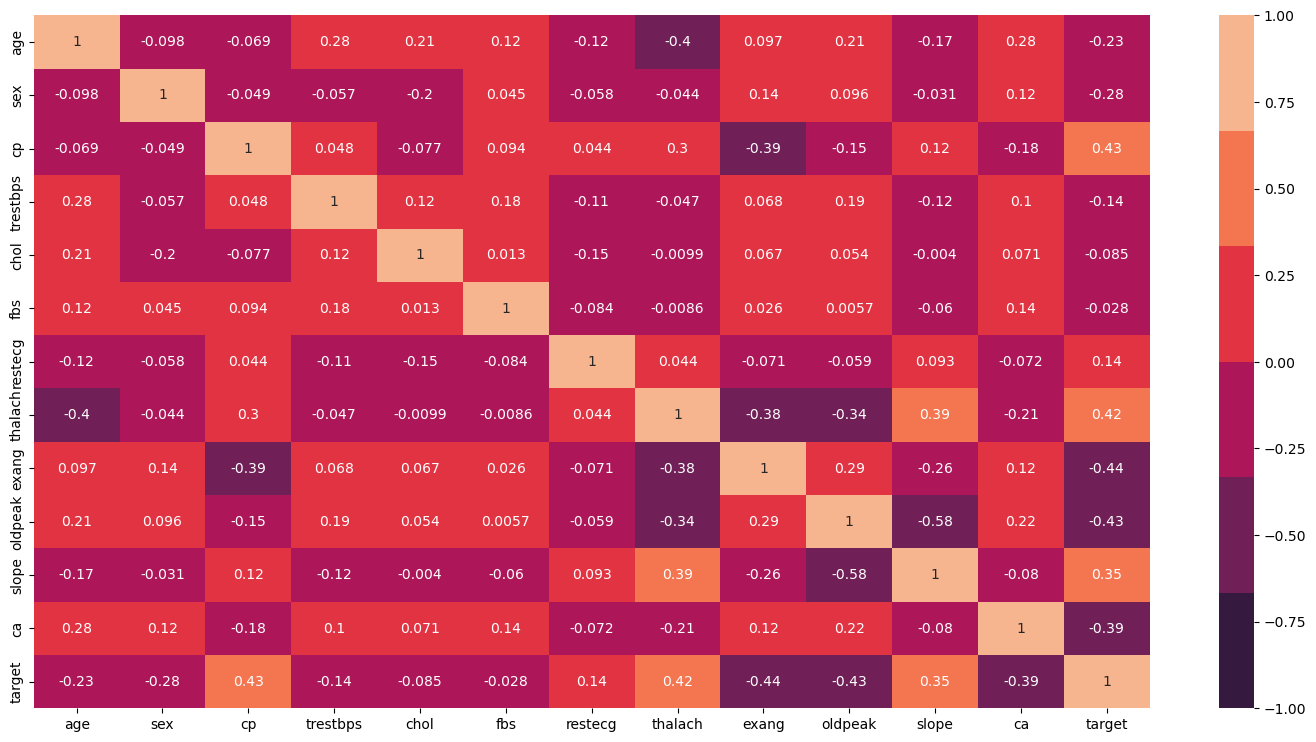

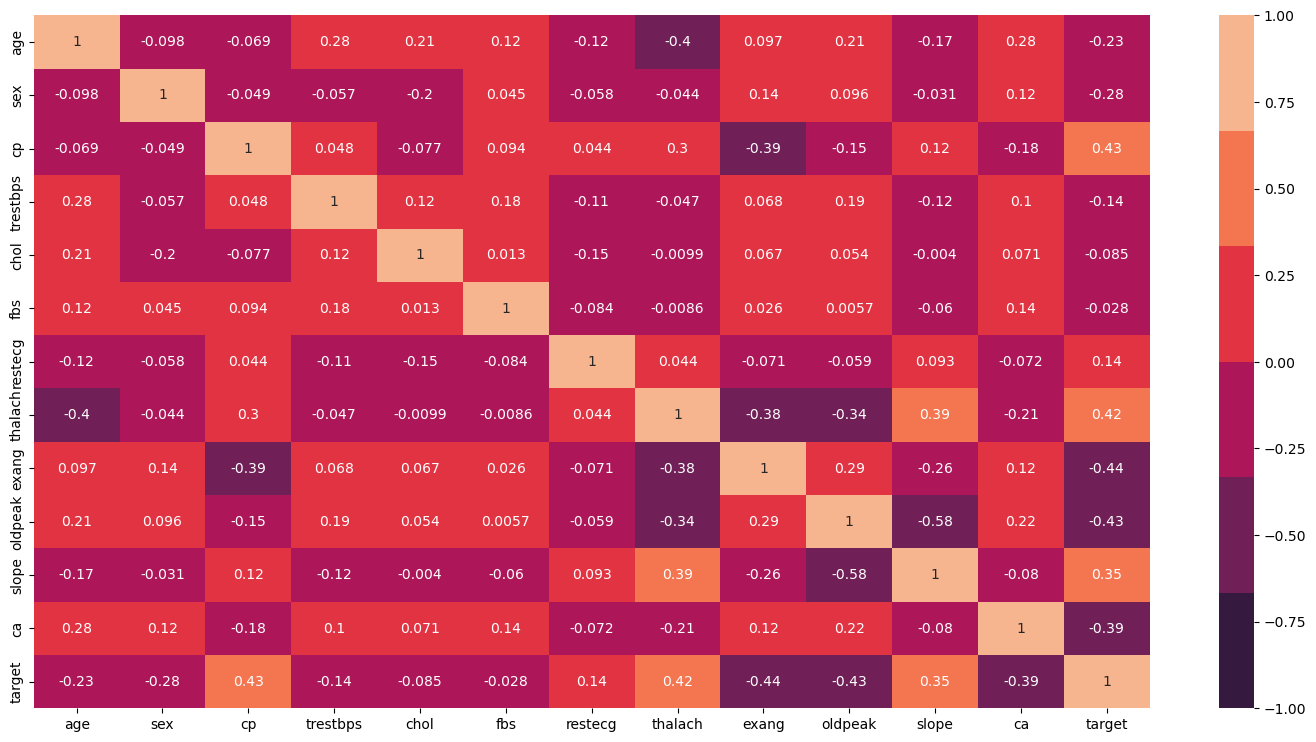

In [25]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),annot=True,cmap=sns.color_palette("rocket"),vmin=-1,vmax=1)
plt.show()

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression
df=data.iloc[:,:]
result_df = pd.DataFrame(columns=['column_name', 'score'])
for col_name in df.columns:
    X = df[[col_name]]
    y = df['target']

    # Apply univariate feature selection to the current column
    selector = SelectKBest(score_func=f_regression, k=1)
    selector.fit(X, y)

    # Get the score of the selected feature
    score = selector.scores_[0]

    new_data = {'column_name': [col_name], 'score': [score]}
    new_df = pd.DataFrame(data=new_data)
    result_df = pd.concat([result_df, new_df], ignore_index=True)


result_df = result_df.sort_values(by='score', ascending=False)

C:\Users\DHANVIN RANJITH\AppData\Local\Temp\ipykernel_26364\3694703703.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_df], ignore_index=True)


In [30]:
result_df

,column_name,score
12,target,1.797693e+308
8,exang,7.095244e+01
2,cp,6.977227e+01
9,oldpeak,6.855144e+01
7,thalach,6.512010e+01
11,ca,5.455983e+01
10,slope,4.090207e+01
1,sex,2.579219e+01
0,age,1.611670e+01
3,trestbps,6.458169e+00


In [31]:
data.drop(columns=data[['fbs','chol','restecg','trestbps']],axis=1,inplace=True)

In [32]:
data.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,150,0,2.3,0,0,1
1,37,1,2,187,0,3.5,0,0,1
2,41,0,1,172,0,1.4,2,0,1
3,56,1,1,178,0,0.8,2,0,1
4,57,0,0,163,1,0.6,2,0,1


In [33]:
x=data.drop('target',axis=1)
y=data.target

In [34]:
x.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca
0,63,1,3,150,0,2.3,0,0
1,37,1,2,187,0,3.5,0,0
2,41,0,1,172,0,1.4,2,0
3,56,1,1,178,0,0.8,2,0
4,57,0,0,163,1,0.6,2,0


In [35]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

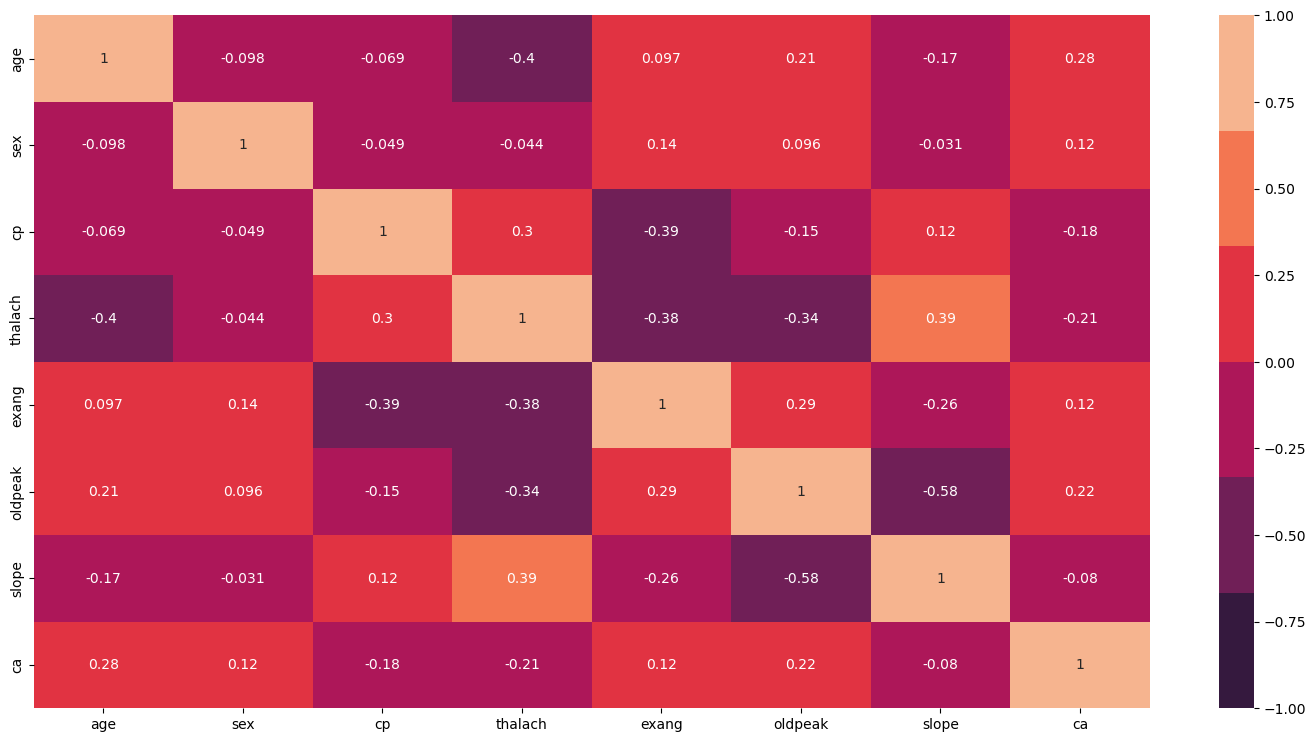

In [38]:
plt.figure(figsize=(18,9))
sns.heatmap(x.corr(),annot=True,cmap=sns.color_palette("rocket"),vmin=-1,vmax=1)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=15)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 8), (61, 8), (242,), (61,))

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [42]:
from sklearn.linear_model import LogisticRegression
heart=LogisticRegression()


In [43]:
heart.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred=heart.predict(x_test)

In [45]:
y_proba=heart.predict_proba(x_test)

In [46]:
y_proba[:,0]

array([0.9753398 , 0.8370942 , 0.12197025, 0.02326926, 0.3848632 ,
       0.83385445, 0.88642817, 0.28262035, 0.58948763, 0.32367364,
       0.06961638, 0.00858404, 0.04738715, 0.85222512, 0.98798081,
       0.42822531, 0.82312476, 0.87027799, 0.02790869, 0.90533035,
       0.54568166, 0.96374684, 0.98749861, 0.72305125, 0.92078241,
       0.06132484, 0.78144262, 0.91008367, 0.21208006, 0.77661143,
       0.96896829, 0.06028461, 0.09419369, 0.19256185, 0.02985819,
       0.98190864, 0.99086148, 0.93621846, 0.57468768, 0.60927461,
       0.48141331, 0.93581636, 0.23535246, 0.72338536, 0.98556782,
       0.98741653, 0.12096678, 0.01480683, 0.9901173 , 0.0552793 ,
       0.11665498, 0.9318176 , 0.06647217, 0.98935646, 0.16839678,
       0.04269327, 0.02981941, 0.63544572, 0.75344405, 0.49233038,
       0.99190491])

In [47]:
heart.score(x_test,y_test)

0.8360655737704918

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cmr=classification_report(y_test,y_pred)

In [49]:
print(cmr)

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        28
           1       0.93      0.76      0.83        33

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61

